# Solutions Lab  | Customer Analysis Round 3

For the Lab Data Transformation solution, see below

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
data = pd.read_csv('/Users/simonefischer/Ironhack/Week_1/Day_4/Afternoon/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')


cols = []
for colname in data.columns:
    cols.append(colname.lower())

data.columns = cols

for colname in data:
     data.columns = data.columns.str.replace(" ", "_")

display(data.head())

data.isnull().sum() #no missing values


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [69]:
#Show DataFrame info

data.head(50)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [70]:
#Describe DataFrame

data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Total count of each response:
response
No     7826
Yes    1308
Name: count, dtype: int64


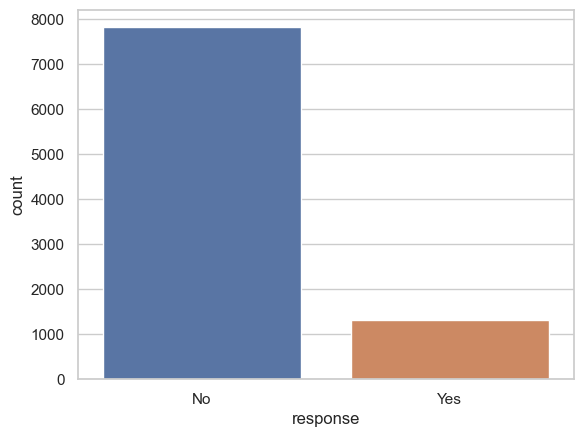

9134
9134


In [71]:
total_count_response = data['response'].value_counts()

# Display the total counts
print("Total count of each response:")
print(total_count_response)

#Show a plot of the total number of responses
fig, ax = plt.subplots()
sns.countplot(data=data, x='response', ax = ax)
plt.show()

#the total amount of responses 

total_count = ((data["response"] == "Yes") + (data["response"] == "No")).sum()

print(total_count) #9134 the number of responses in total = len(data)
print(len(data))

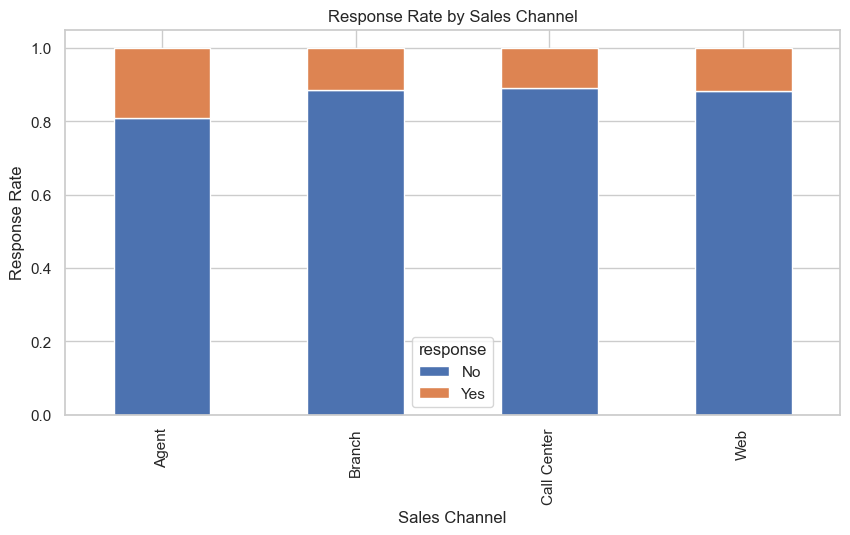

In [72]:
#Show a plot of the response rate by the sales channel

response_rate_by_channel = data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(figsize=(10, 5))
response_rate_by_channel.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Response Rate')
ax.set_xlabel('Sales Channel')
plt.title('Response Rate by Sales Channel')
plt.show()

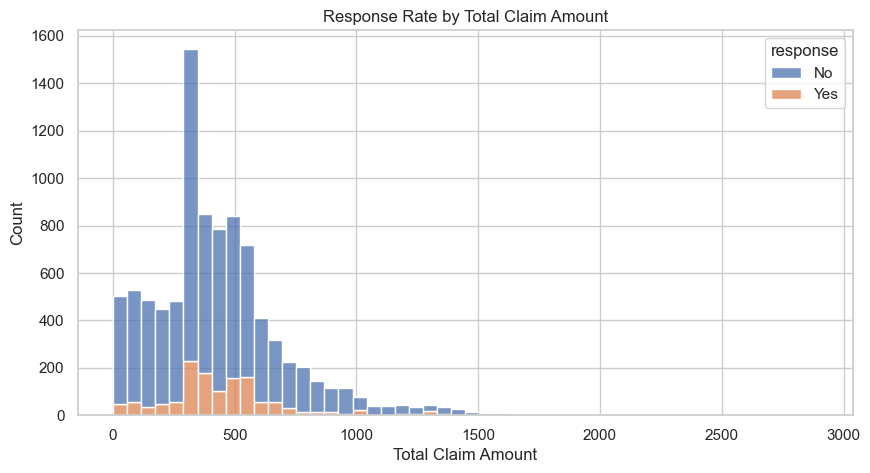

In [73]:
#Show a plot of the response rate by the total claim amount

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='total_claim_amount', bins=50, hue='response', multiple='stack', ax=ax)

ax.set_ylabel('Count')
ax.set_xlabel('Total Claim Amount')
plt.title('Response Rate by Total Claim Amount')

plt.show()

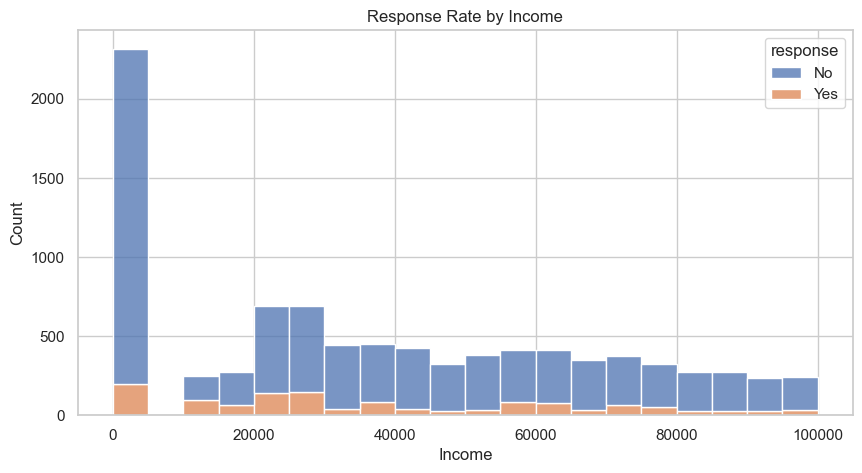

In [74]:
#Show a plot of the response rate by income

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='income', bins=20, hue='response', multiple='stack', ax=ax)

ax.set_ylabel('Count')
ax.set_xlabel('Income')
plt.title('Response Rate by Income')

plt.show()

# Solutions Lab | Data Transformations

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [75]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [76]:
numerical = data.select_dtypes(include=[np.number])

categoricals = data.select_dtypes(include=[object])


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [19]:
#sns.pairplot(numerical)
#plt.show()

In [ ]:
def distribution_plot(df: pd.DataFrame, colname: object) -> None:

        
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].hist(df[colname], bins=50)
    sns.histplot(df[colname], bins=50, ax=ax[1])
    plt.show()

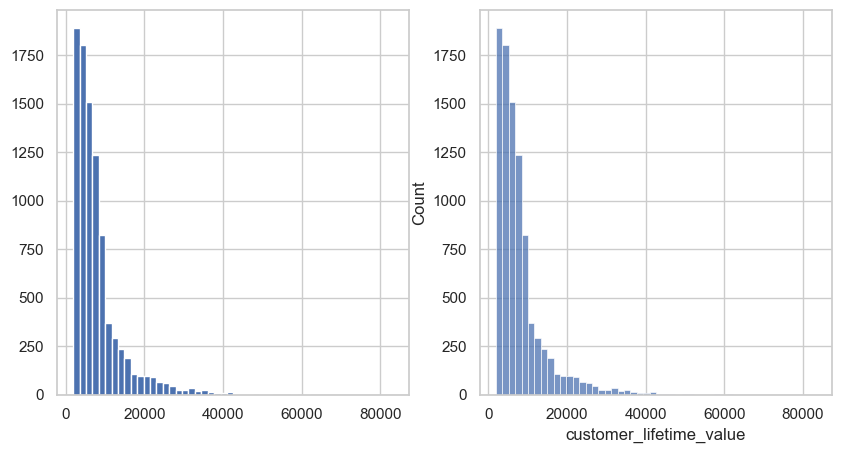

In [49]:
distribution_plot(data, "customer_lifetime_value")

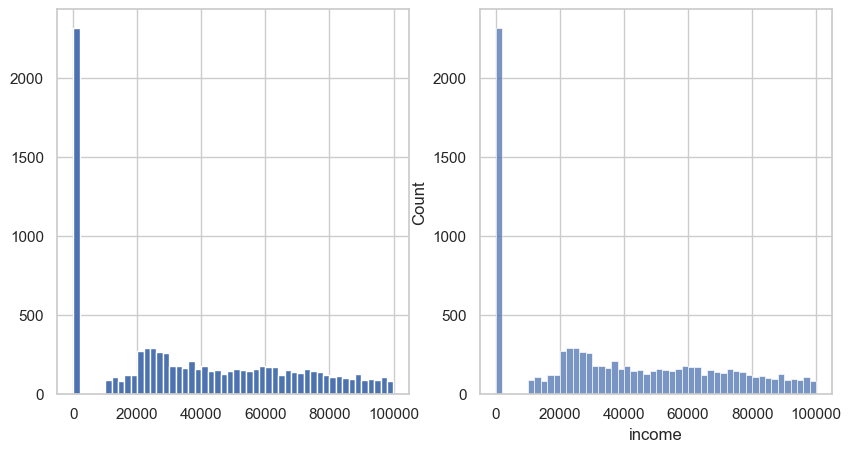

In [48]:
distribution_plot(data, "income")

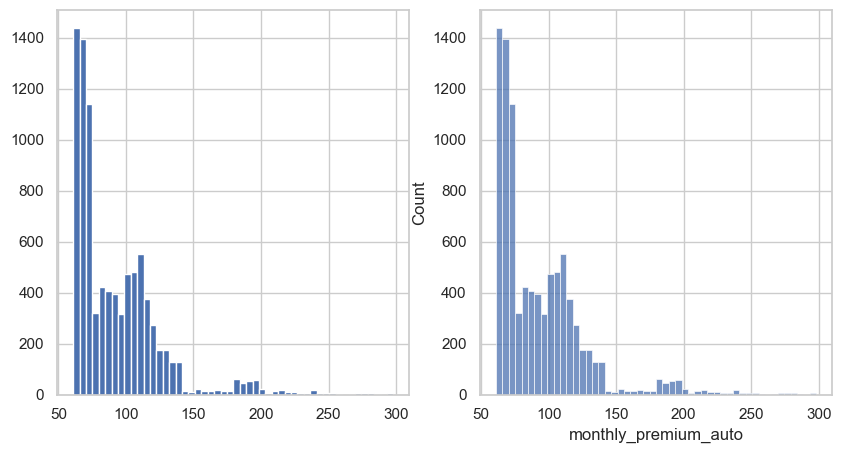

In [47]:
distribution_plot(data, "monthly_premium_auto")

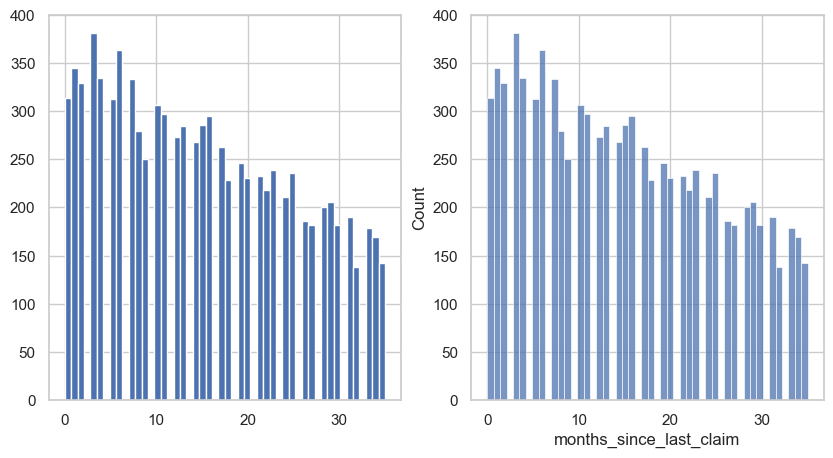

In [45]:
distribution_plot(data, "months_since_last_claim")

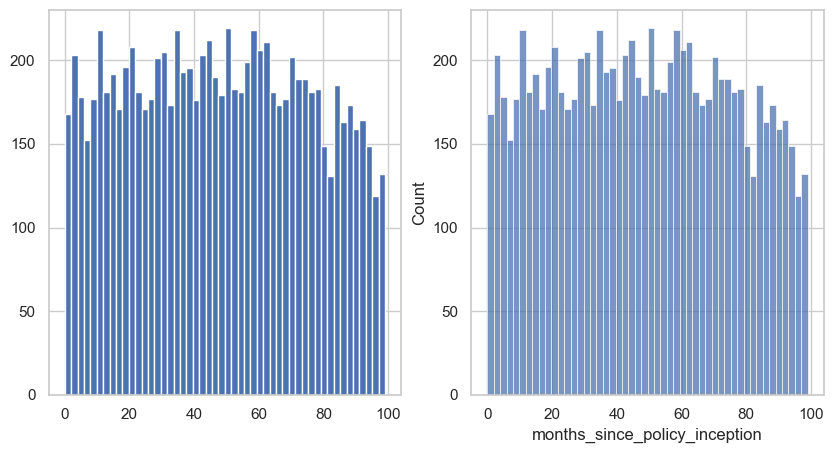

In [50]:
distribution_plot(data, "months_since_policy_inception")

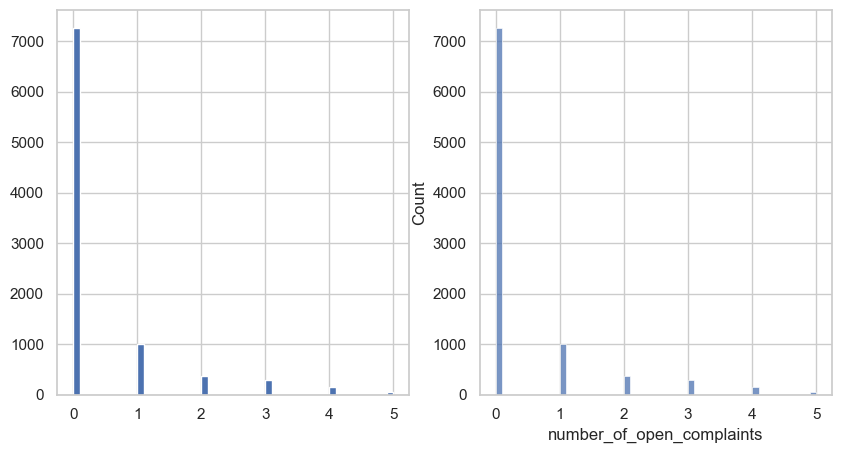

In [52]:
distribution_plot(data, "number_of_open_complaints")

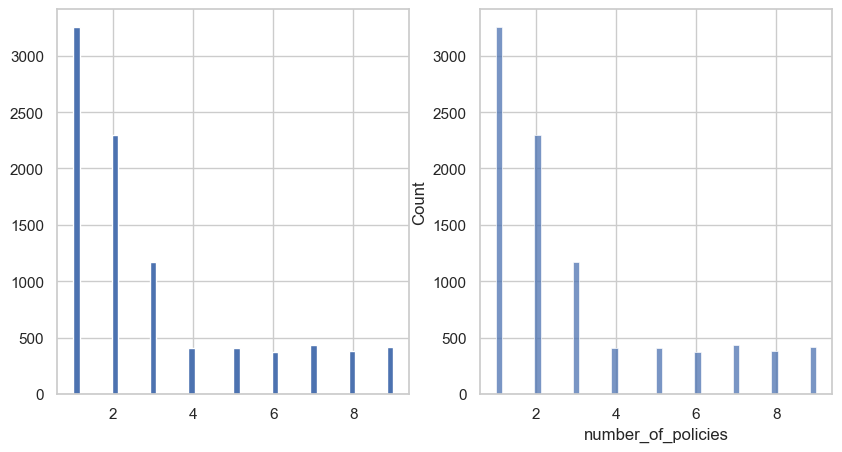

In [54]:
distribution_plot(data, "number_of_policies")

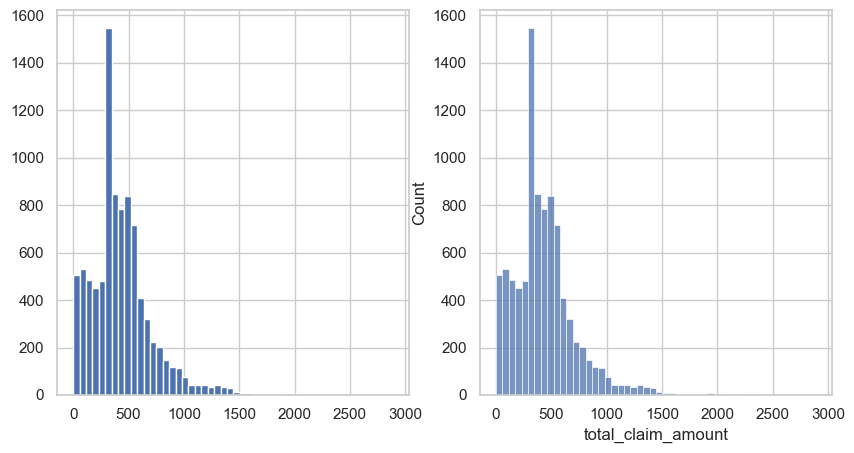

In [57]:
distribution_plot(data, "total_claim_amount")

In [59]:
numerical.skew()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

customer_lifetime_value          3.032280 -> the data is significantly right-skewed, the right tail is longer than the left
income                           0.286887 -> the distribution is considered approximately symmetric
monthly_premium_auto             2.123546 -> the data is right-skewed
months_since_last_claim          0.278586 -> the distribution is considered approximately symmetric
months_since_policy_inception    0.040165 -> the distribution is considered approximately symmetric
number_of_open_complaints        2.783263 -> the data is right-skewed
number_of_policies               1.253333 -> the data is in the [-2,2] range, but still right-skewed
total_claim_amount               1.714966 -> the data is in the [-2,2] range, but still right-skewed

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [79]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


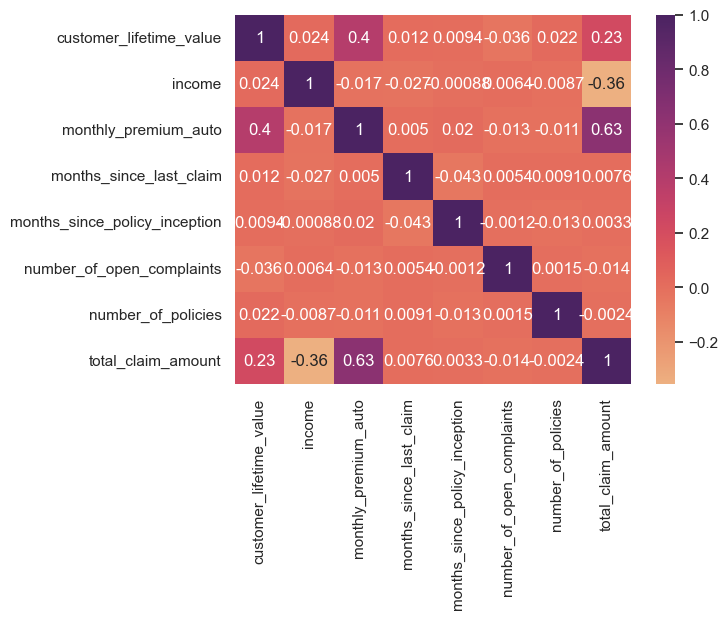

In [82]:
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap)
plt.show()

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df: pd.DataFrame, columns: list):

    # Create a copy of the DataFrame to avoid modifying the original
    X = df.loc[:, columns].copy()
    
    # Add a constant to the DataFrame
    X = add_constant(X)

    # Create DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable'] != 'const'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

# Columns to consider
selected_columns = list(numerical.columns)

# Compute VIF
vif_df = compute_vif(numerical, selected_columns)
display(vif_df)


,Variable,VIF
0,total_claim_amount,2.077546
1,monthly_premium_auto,2.020101
2,income,1.248748
3,customer_lifetime_value,1.190707
4,months_since_last_claim,1.002881
5,months_since_policy_inception,1.002642
6,number_of_open_complaints,1.001459
7,number_of_policies,1.001304


If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

In [ ]:
#it seems like no pair of columns is correlated greater than 0.9